<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 2 - Fronteras no Lineales </H3>
<hr style="height:2px;border:none"/>

**Integrantes:**
* Gabriel Astorga 201573591-3
* Juan Pablo Castillo 201573534-4

**Temas**  
* similaridad: KNN
* Selección de hı́per-parámetros estructurales en SVM, Arboles de Decisión, k-NN y Redes Neuronales.
* Métodos de *kernel*.
* Extracción de características.
* Múltiples anotaciones

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de discusión y entrega: 8 de Noviembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF393-II-2018]

<hr style="height:2px;border:none"/>

### Paquetes de instalación

Como es usual utilizaremos *numpy, scipy, matplotlib* y *sklearn*. Además de éstas se necesitará instalar **keras**, una librerı́a en python para prototipado rápido de modelos basados en redes neuronales, muy similar en espı́ritu a *sklearn*. La librerı́a puede usar *TensorFlow* o *Theano* como backend, siendo éstas las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos. Para detalles sobre la instalación puede revisar [[1]](#refs) o escribir un email a su ayudante.



La tarea se divide en secciones:

[1.](#primero) Sentiment Analysis en Texto  
[2.](#segundo) pendiente


In [1]:
%matplotlib inline

<a id="primero"></a>
## 1. Sentiment Analysis en Texto

El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud
que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un
tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la polaridad
de un trozo de texto, es decir, clasificar una determinada evaluación escrita (*review*), en que una persona
manifiesta una opinión, como *positiva*, *negativa* o *neutral*. Esto también ha sido extendido a otros medios, como lo es analizar la polaridad de textos en redes sociales.  La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente las personas ası́ como el manejo de negaciones, sarcasmo y abreviaciones en una frase.

<img src="https://formtitanhelpdeskimage.s3.amazonaws.com/70c78f9df2fd5c130e7021644f78f4c5.jpg" title="Title text" width="40%" />


Los datos que usaremos para esta actividad corresponden a un subconjunto de los datos publicados en **Kaggle**,  en  el  contexto  de  una  competencia  organizada  por  la  Universidad  de  Stanford  [[2]](#refs).   Cada  registro disponible corresponderá a una opinión sobre una película, registrada sobre el sitio *Rotten Tomatoes*.  Para empezar  nos  limitaremos  a  estudiar  textos  anotados  como  positivos  o  negativos,  clases  que  codificaremos como +1 y 0 respectivamente.

In [2]:
import pandas as pd
#Train Data
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1
fts = open("test_data.csv", "r",  encoding="ISO-8859-1")

#Test Data
fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1

#Texto Comentarios
df_train_text = df_train.Text
df_test_text = df_test.Text
#Etiquetas
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values

df_train_text

0       everything's serious , poetic , earnest and --...
1       narratively , trouble every day is a plodding ...
2       a truly wonderful tale combined with stunning ...
3       jason patric and ray liotta make for one splen...
4       haneke keeps us at arm's length . guided more ...
5       richard pryor mined his personal horrors and c...
6       puts on airs of a hal hartley wannabe film -- ...
7       the characters are interesting and the relatio...
8       this long and relentlessly saccharine film is ...
9       the movie's progression into rambling incohere...
10        as lively an account as seinfeld is deadpan .\n
11      a damn fine and a truly distinctive and a deep...
12      [tries] to parody a genre that's already a jok...
13      there are as many misses as hits , but ultimat...
14           most of the action setups are incoherent .\n
15                          schindler's list it ain't .\n
16      it just goes to show , an intelligent person i...
17      a brac

> a) Describa los datos trabajados, como la cantidad de datos en cada conjunto, largo de los textos, la cantidad de ejemplo por cada clase, o alguna otra forma que piense que pueda ser útil para comprender el problema trabajado.

           Text
Sentiment      
0.0        1784
1.0        1770


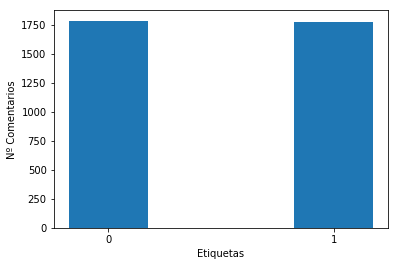

In [3]:
import matplotlib.pyplot as plt

coments_by_sentiment = df_train.groupby(['Sentiment']).count()
print(coments_by_sentiment)
plt.bar(['0','1'], coments_by_sentiment['Text'], 0.35)
plt.xlabel('Etiquetas')
plt.ylabel('Nº Comentarios')
plt.show()

           Lenght Text
Sentiment             
0.0         114.723094
1.0         114.690960


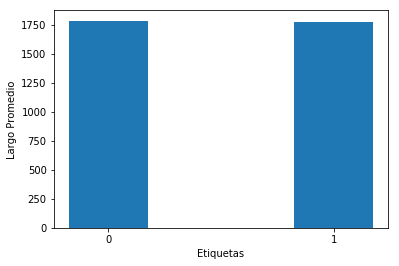

In [4]:
df_train_len = pd.DataFrame()
df_train_len['Sentiment'] = df_train['Sentiment']
df_train_len['Lenght Text'] = df_train['Text'].str.len()

lenght_by_sentiment = df_train_len.groupby(['Sentiment']).mean()
print(lenght_by_sentiment)
plt.bar(['0','1'], coments_by_sentiment['Text'], 0.35)
plt.xlabel('Etiquetas')
plt.ylabel('Largo Promedio')
plt.show()

> b) Construya un conjunto de validación desde el conjunto de entrenamiento para seleccionar modelos. Decida el tamaño dada la cantidad de ejemplos que se tienen para entrenamiento.

Utilzamos el 20% de los datos de entrenamiento para validacion

In [5]:
import math
from sklearn.model_selection import train_test_split

print('Size of original train set :', df_train.shape[0])

#Se eligen el 20% de los datos de entrenamineto para validación
size_test_set = math.ceil(df_train.shape[0]*0.20)
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= size_test_set, random_state=0)

print('Size of new train set: ', df_train_text.shape[0])
print('Size of validation set: ', df_val_text.shape[0])

Size of original train set : 3554
Size of new train set:  2843
Size of validation set:  711


> c) Realice un pre-procesamiento a los textos para normalizar un poco su estructura, para ello utilice el código de ejemplo a continuación, donde se pasa el texto a minúsculas (*lower-casing*), se reducen las mútliples letras, se eliminan palabras sin significados como artículos, pronombres y preposiciones (*stop word removal* [[3]](#refs)), además de pasar las palabras a su tronco léxico con la técnica de *lemmatizer* [[4]](#refs). Comente la importancia de un correcto pre-procesamiento en el domino de lenguaje natural.

Un correcto pre-procesamiento de los textos ayudara a consolidar el modelo a proponer, es decir, ayuda a quitar aquellas palabras que no expresan o no dan información sobre el contenido del texto, a estas palabras se les conoce como stop words y es sumamente importante sacarlas del modelo puesto que estas agregan complejidad innecesaria al problema, ademas pasar las palabras a su contexto léxico tambien es importante puesto que se podrian tener tener palabras que en diferentes tiempos verbales pero significan lo mismo, pero para el modelo o máquina serian distintas, esto añade redundancia de atributos si es que no se consideran como la misma palabra. 

In [6]:
import re, time
import nltk
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from cucco import Cucco

def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #and (len(word) > 3): #delete stopwords
            words+=" "+word
    return words

texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]
texts_train

[" could whole plan produce something make fatal attraction look like classic comparison ? 's sane rationale think swimfan 's existence .",
 ' stripped-down dramatic construct , austere imagery abstract character equal part poetry politics , obvious time evocative heartfelt .',
 ' nightmare date half-formed wit done great disservice lack critical distance sad trust liberal art college bumper sticker platitude .',
 " 're merely watching history , 're engulfed .",
 ' worth look curiosity .',
 ' move bond ; girl deserves sequel .',
 ' come like rejected abc afterschool special , freshened dunce screenwriting 101 class . . . . designed provide mix smile tear , `` crossroad `` instead provokes handful unintentional howler numerous yawn .',
 ' . . . roller-coaster ride movie',
 " 's wickedly subversive bent best part birthday girl .",
 " actor much charisma 'd happy listen reading phone book . hugh grant sandra bullock two likeable actor .",
 " 's hard say might enjoy , tolstoy groupie ? 's 

> d) Construya una representación vectorial a los textos de entrada para poder ser manejados y clasificados por los modelos de aprendizaje. Para ésto utilice el tipo de característica más común, que consiste en contar cuántas veces aparece cada términos/palabras en el texto, denominado **TF** (*term-frequency*). Para esto, se necesita contar con un vocabulario base, el cual se construirá a través de la unión de todas las palabras que observemos en los textos de entrenamiento ¿Cuáles son las palabras más frecuentes?

In [7]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

vectorizer= CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation

vectorizer.fit(texts_train)

#Matriz dispersa con texto x terminos, con nº de ocurrencias
features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)
features_test = vectorizer.transform(texts_test)

#Vocabulario
vocab = vectorizer.get_feature_names()

dist_train =list(np.array(features_train.sum(axis=0)).reshape(-1,))
dist_val = list(np.array(features_val.sum(axis=0)).reshape(-1,))
dist_test = list(np.array(features_test.sum(axis=0)).reshape(-1,))
df_dist = pd.DataFrame({'word':vocab, '#': dist_train}).sort_values(by='#', ascending=False)
df_dist.head(50)

,word,#
2894,film,468
4954,movie,399
5245,one,208
3422,ha,200
4434,like,192
4607,make,156
7200,story,143
1200,character,136
2603,even,119
7649,time,118


Como se observa las palabras más repetidas en los comentarios son aquellas relacionadas al contexto de las películas, además de palabras que denotan sentimentalidad como lo son 'good', 'well', 'bad' entre otras. Es decir no hay nada fuera de lo comun en las palabras más repetidas que no se preveerian dentro de este contexto.

> e) Para tener una visión distinta y entender mejor la representación vectorial realizada, visualice los datos en un plano 2D. Para ésto utilice la técnica **LSA** (*Latent Semantic Analysis*) [[5]](#refs) que a diferencia de PCA, **no centra** los datos antes de realizar la descomposicipon SVD, de ésta manera podrá visualizar el espacio semántico de "conceptos" latentes usados en la representación. Coloree cada texto en base a su clase ¿Qué indica lo observado? Comente e interprete los resultados

(2843, 2)


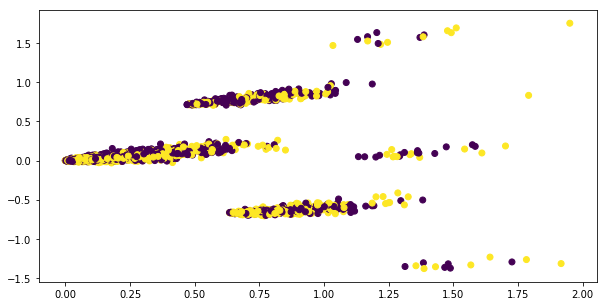

In [8]:
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
print(x_plot.shape)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()

Se observan almenos 6 agrupaciones de textos(comentarios), que tendrian relación entre si. Sin embargo estas agrupaciones no se observan que tenga alguna relación la etiqueta de "sentimentalidad" del comentario, es decir, si es positivo o negativo, por que se puede decir desde la reducción de dimensionalidad de LSA es que de acuerdo a TF los comentarios son similares si utilizan terminos similares, por lo que no necesariamente comentarios positivos tendran terminos similares, lo mismo ocurre con los comentarios negativos. Por lo tanto como se observa que comentarios y negativos se tienden a agrupar en un mismo "grupo", esto se deveria que estos hablan de la misma pelicula o generos similares de esta, en este sentido si se tienden a repetir terminos como lo son los personajes o titulos de las películas.

> f) Entrene un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma $l_2$). Varíe el parámetro de regularización $C$, en potencias de 10, midiendo el error de predicción obtenido sobre los datos de entrenamiento y validación, construya un gráfico que muestre la variación de ambos errores respecto al parámetro $C$. Explique el significado y valor esperado del parámetro de regularización.

c:\users\castillo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


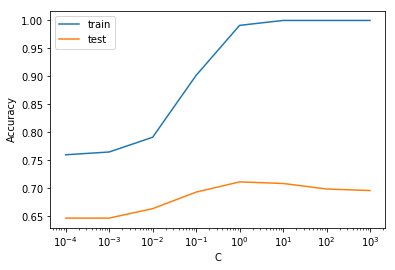

,Cs,Train_acc,Test_acc
0,0.0001,0.760113,0.646976
1,0.0010,0.765037,0.646976
2,0.0100,0.791418,0.663854
3,0.1000,0.901864,0.693390
4,1.0000,0.991206,0.711674
5,10.0000,1.000000,0.708861
6,100.0000,1.000000,0.699015
7,1000.0000,1.000000,0.696203


In [9]:
from sklearn.linear_model import LogisticRegression

def do_LOGIT(x,y,xv,yv, param):
    #print("Param C= ",param)
    model= LogisticRegression()
    model.set_params(penalty='l2',C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

Cs = [10**i for i in np.arange(-4,4, dtype = float)]

def plt_LOGIT(x, y, xv, yv, Cs):
    train_accuracy = []
    test_accuracy = []
    for c in Cs:   
        model, train_acc, test_acc = do_LOGIT(x,y,xv,yv, param=c)
        train_accuracy.append(train_acc)
        test_accuracy.append(test_acc)
    plt.plot(Cs, train_accuracy, label='train')
    plt.plot(Cs, test_accuracy, label='test')
    plt.legend()
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.xscale('log')
    plt.show()
    return(pd.DataFrame({'Cs': Cs, 'Train_acc':train_accuracy, 'Test_acc':test_accuracy}))
plt_LOGIT(features_train, labels_train, features_val, labels_val, Cs)

Existe Overfiting(sobreajuste)...

> g) Entrene una Máquina de Soporte Vectorial (SVM) con distintos kernels. Similar a lo anterior, construya un gráfico que muestre la variación de ambos errores respecto al parámetro de regularización $C$ para cada tipo de kernel que experimente. Explique el significado y valor esperado de los parámetros en este modelo.

2.0 2.0


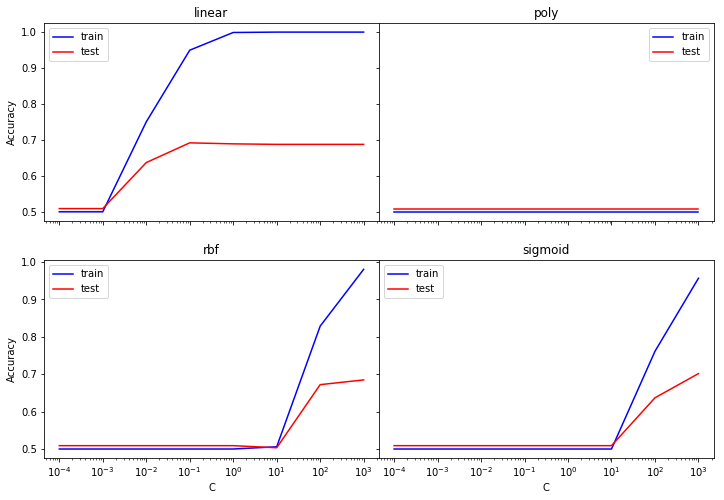

In [10]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    #print("Param C= ", param, 'Kernel= ', kernel)
    model= SVM(gamma='auto')
    model.set_params(C=param,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

def mul_kernels_SVM(x, y, xv, yv, Cs, kernels, do_SVM):
    print(len(kernels)/2, len(kernels)/2)
    fig, axs = plt.subplots(int(len(kernels)/2), int(len(kernels)/2), 
                            sharex='col', sharey='row', 
                            gridspec_kw={'hspace': 0.2, 'wspace': 0},
                            figsize=(12,8)
                           )
    dfs_acc = []
    for i, kernel in enumerate(kernels):
        train_accuracy = []
        test_accuracy = []
        for c in Cs:
            model, train_acc, test_acc = do_SVM(x, y, xv, yv, param=c, kernel=kernel)
            train_accuracy.append(train_acc)
            test_accuracy.append(test_acc)
        df = pd.DataFrame()
        df['C'] = Cs
        df['Train_acc'] = train_accuracy
        df['Test_acc'] = test_accuracy
        dfs_acc.append(df)
        axs[int(i/2), i%2].plot(Cs, train_accuracy, 'b', label='train')
        axs[int(i/2), i%2].plot(Cs, test_accuracy, 'r',label='test')
        axs[int(i/2), i%2].set_title(kernel)
        axs[int(i/2), i%2].legend()
    for ax in axs.flat:
        ax.set(xlabel='C', ylabel='Accuracy', xscale='log')
    for ax in axs.flat:
        ax.label_outer()
    plt.legend()
    plt.show()
    return dfs_acc
        
accs = mul_kernels_SVM(features_train, labels_train, features_val, labels_val, Cs=Cs, kernels=kernels, do_SVM=do_SVM)

In [13]:
accs[3]

,C,Train_acc,Test_acc
0,0.0001,0.500176,0.509142
1,0.0010,0.500176,0.509142
2,0.0100,0.500176,0.509142
3,0.1000,0.500176,0.509142
4,1.0000,0.500176,0.509142
5,10.0000,0.500176,0.509142
6,100.0000,0.761520,0.637131
7,1000.0000,0.956736,0.701828


> h) Utilice el algoritmo de similaridad k-NN para intentar resolver el problema. Varíe el parámetro de los vecinos $k$ en un rango que estime conveniente y realice graficos de errores como en las preguntas anteriores. Comente sobre el valor esperado de este parámetro.

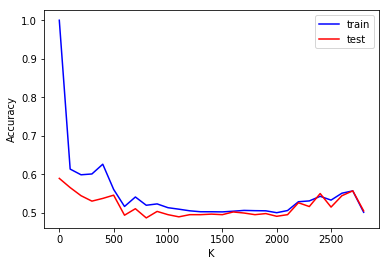

      Ks  Train_acc  Test_acc
0      1   1.000000  0.589311
1    101   0.613437  0.565401
2    201   0.598663  0.544304
3    301   0.600774  0.530239
4    401   0.626099  0.537271
5    501   0.560675  0.545710
6    601   0.516356  0.493671
7    701   0.540978  0.510549
8    801   0.519522  0.486639
9    901   0.523039  0.503516
10  1001   0.513190  0.495077
11  1101   0.509321  0.489451
12  1201   0.505100  0.495077
13  1301   0.502638  0.495077
14  1401   0.502638  0.496484
15  1501   0.502286  0.495077
16  1601   0.504045  0.502110
17  1701   0.506155  0.499297
18  1801   0.505452  0.495077
19  1901   0.505100  0.497890
20  2001   0.500176  0.490858
21  2101   0.505804  0.495077
22  2201   0.528667  0.526020
23  2301   0.530777  0.516174
24  2401   0.542737  0.549930
25  2501   0.532888  0.514768
26  2601   0.550827  0.544304
27  2701   0.556806  0.556962
28  2801   0.501231  0.504923


In [14]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    #print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

Ks = np.arange(1, features_train.shape[0], 100)

train_accuracy = []
test_accuracy = []

for k in Ks:
    model, train_acc, test_acc = do_KNN(features_train, labels_train, features_val, labels_val, k)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

plt.plot(Ks, train_accuracy, 'b', label='train')
plt.plot(Ks, test_accuracy, 'r', label='test')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(pd.DataFrame({'Ks': Ks, 'Train_acc': train_accuracy, 'Test_acc':test_accuracy}))

> i) Entrene un Arbol de Decisión para resolver el problema. Varíe los parámetros de *max depth* y *min samples split* de manera separada, constuyendo gráficos de error respecto a estos parámetros. *Los valores que se presentan son sugerencias, no es necesario utilizar los mismos*. Comente sobre la diferencia entre la selección de estos dos parámetros.

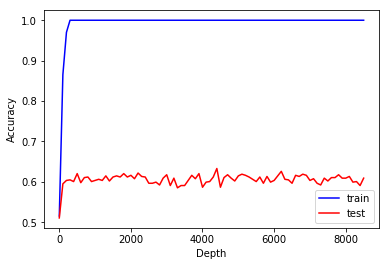

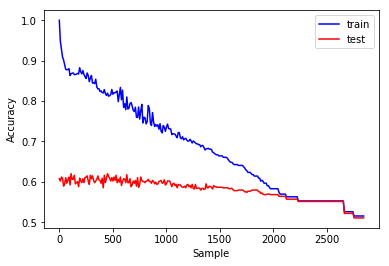

In [16]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    #print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Depths = np.arange(1, features_train.shape[1], 100) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , 10 ) #choose steps

train_accuracy_by_depth = []
test_accuracy_by_depth = []

for depth in Depths:
    model, train_acc, test_acc = do_Tree(features_train, labels_train, features_val, labels_val, param_d=depth)
    train_accuracy_by_depth.append(train_acc)
    test_accuracy_by_depth.append(test_acc)
plt.plot(Depths, train_accuracy_by_depth, 'b', label='train')
plt.plot(Depths, test_accuracy_by_depth, 'r', label='test')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

train_accuracy_by_sample = []
test_accuracy_by_sample = []

for sample in SamplesS:
    model, train_acc, test_acc = do_Tree(features_train, labels_train, features_val, labels_val, param_m=sample)
    train_accuracy_by_sample.append(train_acc)
    test_accuracy_by_sample.append(test_acc)
plt.plot(SamplesS, train_accuracy_by_sample, 'b', label='train')
plt.plot(SamplesS, test_accuracy_by_sample, 'r', label='test')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Accuracy')
plt.show()

> j) Utilice una Red Neuronal Artificial (ANN) para intentar resolver el problema, como la que se señala a continuación (utilizando el framework de *keras*): entrenada por 25 iteraciones al dataset (*epochs*) con un tamaño de *batch* de 128 para las actualizaciones de los pesos, utilizando *SGD* con una tasa de aprendizaje $0.1$ sobre la función de pérdida binaria de clasificación. La arquitectura de la red contiene una capa de salida con una única neurona que indica la probabilidad de que el texto sea positivo, una capa escondida con número de neuronas $N_h$ y la capa de entrada implícita para $x$. Varíe el parámetro que corresponde al número de neuronas en la capa oculta $N_h$, en potencias de 2, y vuelva a realizar el gráfico de error con respecto al parámetro. Comente.
```python
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,10)]
```

Using TensorFlow backend.


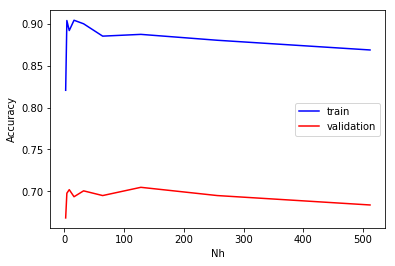

,Nh,Train_acc,Test_acc
0,2,0.820612,0.668073
1,4,0.903975,0.697609
2,8,0.892015,0.701828
3,16,0.904326,0.693390
4,32,0.900106,0.700422
5,64,0.885332,0.694796
6,128,0.887443,0.704641
7,256,0.880408,0.694796
8,512,0.868801,0.683544


In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param, act_hidden='linear'):
    #print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation=act_hidden))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc

def plt_ANN(x, y, xv, yv, range_nh, act_hidden='linear'):
    train_accuracy = []
    test_accuracy = []
    for n in range_nh:
        model, train_acc, test_acc = do_ANN(x, y, xv, yv, n, act_hidden=act_hidden)
        train_accuracy.append(train_acc)
        test_accuracy.append(test_acc)
    plt.plot(range_nh, train_accuracy, 'b',label='train')
    plt.plot(range_nh, test_accuracy, 'r',label='validation')
    plt.xlabel('Nh')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    return pd.DataFrame({'Nh':range_nh, 'Train_acc': train_accuracy, 'Test_acc': test_accuracy})

N_h = [2**i for i in range(1,10)]
plt_ANN(features_train, labels_train, features_val, labels_val, N_h, act_hidden='relu')

De acuerdo al gráfico se observa que accuracy del modelo tiene su máximo con 2 neuronas en la capa oculta para el conjunto de entrenamiento, sin embargo con 8 neuronas se observa una disminución en el error de predicción del conjunto de validación, sin embargo este es casi insignificante (una mejora menor al $1\%$). Por otro lado se observa que despues de 128 neuronas ocultas el modelo "desaprende" sin embargo luego en la curva se logra observar que el modelo comienza nuevamente a aprender, sin embargo a un ritmo muy lento en comparación al crecimiento de potencias de 2 de la cantidad de neuronas en la capa oculta. Por lo tanto el modelo de 1 capa con $N_h$ cantidad de neuronas no supera el $70\%$ de accuracy y se podria decir que el problema es dificil de resolver con más precisión sin agregar más capas ocultas a la red neuronal propuesta.

> k) Ahora evalúe sobre el conjunto de pruebas el mejor modelo obtenido, seleccionado en base a la métrica de desempeño en el conjunto de validación. Comente sobre la calidad obtenida en el problema trabajado ¿Es un buen valor? ¿Cuál podría ser un valor de referencia?

De acuerdo a la métrica de desempeño del conjunto de validación, el mejor modelo obtenido es el regresor logistico con parámetro de regularización C = 1, con un accuracy $\approx 71\%$ en el conjunto de validación. Sin embargo la red neuronal con 1 capa escondida con aproximadamente 8 neuronas y función de activación relu para la capa escondida alcanza $\approx 70\%$, además el error de predicción de una SVM con kernel sigmoidal y $C = 1000$ esta practicamente igualada con la red neuronal, incluso con un menor error de entrenamiento.Cual podria ser un valor de referencia ..

**Regresor Logistico**

In [ ]:
model_log,_,_ = do_LOGIT(features_train, labels_train, features_val , labels_val, 1)
model_log.score(features_test, labels_test)

**Red Neuronal**

In [ ]:
model_ann,_,_ = do_ANN(features_train, labels_train, features_val, labels_val, 8, act_hidden='relu')
model_ann.evaluate(features_test, labels_test, verbose=0)[1]

**SVM**

In [ ]:
model_svm,_,_ = do_SVM(features_train, labels_train, features_val, labels_val, param=1000, kernel='linear')
model_svm.score(features_test, labels_test)

Como se observa, como los tres modelos tienen un error de predicción parecidos en el conjunto de validación, y por tanto estos tambien lo hacen en el conjunto de test.

> l) Para comparar sus resultados utilice el modelo VADER (*Valence Aware Dictionary and sEntiment Reasoner*) [[6]](#refs), el cual entrega una *score* de predicción a nivel léxico (de palabras que comúnmente se asocian a una orientiación positiva o negativa). Este modelo construido manualmente no requiere entrenamiento, por lo que solo debe evaluar en conjunto de pruebas realizando predicciones del texto bruto (sin pre-procesamiento). Comente.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)

Se observa que vader entrega un pero accuracy que los métodos enunciados anteriormente, quizas esto se debe al poco o nula información que tiene vader del contexto de los textos, en cambio los métodos anteriores como fueron entrenados con conjuntos de ejemplos sacados del mismo contexto, puede predecir de "mejor" forma si es positivo o negativo. Sin embargo tampoco se queda muy atras a los metodos propuestos, esto denota que los modelos anteriores se pueden mejorar entregandole a los modelos información sobre aquellas palabras que se asocian a texto negativo.

> m) Bajo la idea del modelo VADER realice un análisis de qué palabras su modelo tiende a considerar como positivas o negativas por si solas. Algunos de los modelos estudiados en esta sección realizan una predicción probabilista, utilice uno de éstos para verificar lo solicitado. Sobre la representación *TF* genere datos de entradas que contengan una sola palabra del vocabulario para evaluar que predicción les genera su modelo a esas palabras. Muestre las palabras más negativas y positivas en el vocabulario consideradas por su modelo. Comente.
```python
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)
vocab
```

In [ ]:
V = len(vocab)
word_scores = np.zeros((V, 2))

#Neural network 
model, train_acc, test_acc = do_ANN(features_train, labels_train, features_val, labels_val, 8)

pw = []
nw = [] 

for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_score = model.predict_proba(x_word)
    word_scores[i] = model.predict_proba(x_word)
    if word_score > 0.7:
        pw.append([vocab[i], word_score[0,0]])
    elif word_score < 0.3:
        nw.append([vocab[i], word_score[0,0]])
pw = np.array(pw)
nw = np.array(nw)

positive_words = pd.DataFrame()
negative_words = pd.DataFrame()
positive_words['Word'] = pw[:,0]
positive_words['Score'] = pw[:,1]

negative_words['Word'] = nw[:,0]
negative_words['Score'] = nw[:,1]

In [ ]:
#Palabras Positivas
print(positive_words)

Sorprende que no aparezca la palabra good, ademas se obtiene como muy positiva la palabra world, life y performance, las cuales no denotan por si mismas positividad de un comentario o texto.

In [ ]:
#Palabras Negativas
print(negative_words)

En cambio en las palabras negativas si parece coincidir con lo que normalmente uno consideraria un comentario negativo, con la aparición de la palabra bad , fails , boring entre otras, sin embargo aparecen algunas que se podrian cuestionar, como lo son tv, ultimately. Esto puede ser a la coincidencia de la utilización de estas palabras en los comentarios negativos, es por esto quizas que el modelo necesita una mayor cantidad de ejemplos para entrenarse y no cometer este tipo de errores de clasificación.

> n) Intente mejorar los resultados de otra manera. Varíe el pre-procesamiento realizado a los datos en c), por ejemplo eliminar símbolos, números o aplicar la técnica de *stemmming* [[7]](#refs) en lugar de *lemmatization* para llevar a su tronco léxico.
```python
from nltk.stem.porter import PorterStemmer
wordstemmer = PorterStemmer()
wordstemmer.stem(word)
```

In [ ]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
from cucco import Cucco 



def get_common_words(texts, n=100):
    all_documents = ''
    for t in texts:
        all_documents += ' ' + t
        
    wordtokens = word_tokenize(all_documents)
    fDist = nltk.FreqDist(wordtokens)
    most_freq_words = fDist.most_common(n)
    n_common_words = []
    for word, freq in most_freq_words:
        n_common_words.append(word)
    return n_common_words

def base_word(word, type='Lemmatizer'):
    if type == 'Lemmatizer':
        wordlemmatizer = WordNetLemmatizer()
        return wordlemmatizer.lemmatize(word)
    else:
        wordstemmer = PorterStemmer()
        return wordstemmer.stem(word)
    
def word_extractor(text, common_words = [], type='Lemmatizer'):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    text = re.sub(r'\d+', '', text)# Se eliminan los digitos (números)
    words = ""
    wordtokens = [ base_word(word.lower(), type='Lemmatizer') if type == 'Lemmatizer' else base_word(word.lower(), type='Stemming') for word in word_tokenize(text) ]
    common = False
    if common_words == []:
        common = True
    for word in wordtokens:
        if (word not in commonwords) and (len(word)>3) and (common or word in common_words): #delete stopwords
            words+=" "+word
    return words

texts_train_stemming = [word_extractor(text, type='Stemming') for text in df_train_text]
texts_val_stemming = [word_extractor(text, type='Stemming') for text in df_val_text]
texts_test_stemming = [word_extractor(text, type='Stemming') for text in df_test_text]


vectorizer= CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation

vectorizer.fit(texts_train_stemming)

#Matriz dispersa con textoXterminos, con nº de ocurrencias
f_train_stemming = vectorizer.transform(texts_train_stemming)
f_val_stemming = vectorizer.transform(texts_val_stemming)
f_test_stemming = vectorizer.transform(texts_test_stemming)

vocab_stemming = vectorizer.get_feature_names()

print(f_train_stemming.shape)


In [ ]:
N_h = [ 2**i for i in range(1,10)]
plt_ANN(f_train_stemming, labels_train, f_val_stemming, labels_val, N_h, act_hidden='relu')

In [ ]:
plt_LOGIT(f_train_stemming, labels_train, f_val_stemming, labels_val, Cs=Cs)

In [ ]:
accs_stemming = mul_kernels_SVM(f_train_stemming, labels_train, f_val_stemming, labels_val, Cs=Cs, kernels=kernels, do_SVM=do_SVM)

In [ ]:
accs_stemming[0]

> o) Varíe la representación utilizada actualmente por alguna otra que ayude a mejorar el desempeño, por ejemplo reducir el peso de una palabra si es que aparece en muchos textos: TF-IDF. Existen varias opciones que podría realizar para mejorar el desempeño, por ejemplo reducir el vocabulario a las $K$ palabras más frecuentes, eliminar las palabras menos frecuentes, normalizar la representación, utilizar *n-gramas*, entre otras.

In [ ]:
common_words = get_common_words(texts_train, n = 4000)
texts_train_2 = [word_extractor(text, type='Lemmatizer', common_words=common_words) for text in df_train_text]
texts_val_2 = [word_extractor(text, type='Lemmatizer', common_words=common_words) for text in df_val_text]
texts_test_2 = [word_extractor(text, type='Lemmatizer', common_words=common_words) for text in df_test_text]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

N_h = [ 2**i for i in range(1,10)]

tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 2), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train_2)
x = tfidf_model.transform(texts_train_2)
x_val = tfidf_model.transform(texts_val_2)
x_test = tfidf_model.transform(texts_test)

In [ ]:
plt_ANN(x, labels_train, x_val, labels_val, N_h, act_hidden='relu')

In [ ]:
acc_cw = mul_kernels_SVM(x, labels_train, x_val, labels_val, Cs=Cs, kernels=kernels, do_SVM=do_SVM)

In [ ]:
acc_cw[0]# Kernel Lineal

In [ ]:
plt_LOGIT(x, labels_train, x_val, labels_val, Cs)

> p) Utilice métricas auxiliares para entender en qué falla su mejor modelo obtenido hasta el momento. ¿La información entregada indica cómo se podría mejorar o cual sería la causa de la falla?

In [ ]:
from sklearn.metrics import classification_report

model, train_acc, test_acc = do_LOGIT(features_train, labels_train, features_val, labels_val, 1)

def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x)))
score_the_model(model, features_test, labels_test )

> q) Algo que se puede modificar en algunos modelos de aprendizaje es poner peso en cada una de las clases, por ejemplo si una clase es de mayor interés que las otras e interesa reducir más su error. En *sklearn* ésto puede ser realizado con el parámetro de *class_weights*. Por ejemplo, asigne que detectar los textos negativos me interesa 5 veces más que detectar los textos positivos. Comente.

In [ ]:
classes_weights = {0: 1, 1: 5} #or choose..

model= SVM(gamma='auto')
model.set_params(C=1,kernel='linear', class_weight=classes_weights) #try rbf and linear at least
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)

> r) Visualice la clasificación que realiza su mejor modelo sobre algunos textos de pruebas ¿Qué entega mas información, una predicción categórica o una continua? ¿Cuál podría ser el beneficio de una o de otra? Comente

In [ ]:
log_model, _, _ = do_LOGIT(features_train, labels_train, features_val, labels_val, 1)

test_pred = log_model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

> s) Comente sobre el desempeño obtenido por los diferentes modelos de aprendizaje utilizados al enfrentar el problema, ¿Dónde pareciera estar la mejora? ¿En la variación de los modelos y sus parámetros o en la modificación de la representación? ¿Cuál modelo de aprendizaje le parece mejor en base a su criterio? ya sea desempeño, tiempo de ejecución comodidad en las decisiones involucradas, etc.

A partir de los modelos propuestos en este documento, se observo que para este problema el regresor logistico entrego mejores resultados a la hora de predecir, y además en temas de desempeño es el modelo que menos tiempo toma de entrenar en comparación a los demas métodos testeados. Por otro lado se observo que los metodos de Knn y arboles de decisión sufren de mucho overfitting devido a la alta dimensionalidad del problema, por lo que no son recomendables. Por último las SVM y redes neuronales si bien entregaron resultados parecidos en temas de costo computacional son muchos más costosos. 

<a id="segundo"></a>
## 2. Problema de Múltiples Anotaciones

El aprendizaje supervisado visto en clases da cuenta que existe una única posible etiqueta $z$ (*ground truth*) asociada a un dato $x$ para poder aprender de los datos. Sin embargo, la definición del *ground truth* en algunos casos puede resultar bastante difícil de definir o bastante costoso, por ejemplo en problemas médicos donde se deben realizar invasivos exámenes para conocer la "verdad absoluta". Como alternativa se pueden recolectar múltiples anotaciones desde personas inexpertas en el área para poder estimar el *ground truth*. 

<img src="http://www.irishenvironment.com/wp-content/uploads/2013/11/crowdsourcing.jpg" title="Title text" width="40%" />

En esta actividad se trabajará en el caso en que contamos con múltiples anotaciones por cada dato de entrada $x_i$ dadas por personas inexpertas a través de Amazon Mechanical Turk (__[AMT](https://www.mturk.com/)__), es decir, $y^{(1)}, y^{(2)} \ldots y^{(T_i)}$. El problema de predicción trabajado será el mismo de la actividad anterior, el análisis de sentimiento de un extracto de texto en Rotten Tomatoes. Los datos trabajados [[8]](#refs) pueden ser descargados de la página del autor.

In [18]:
import pandas as pd
import numpy as np
import re
df = pd.read_csv("./sentiment_polarity/mturk_answers.csv")

> El objetivo de la actividad será el de obtener un modelo predictor del *ground truth* sin entrenar directamente con esto, sino que utilizar las múltiples anotaciones de las personas

### Importante
* Deberá crear un conjunto aleatorio de pruebas que solo contenga los textos y el sentimiento *ground truth* (sin repeticiones)
* Los valores de *ground truth* están **solo para evaluar**, no puede utilizarlos para entrenar o tomar decisiones en su modelo.


La métrica de evaluación será el accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

Primero se dividen los datos siguiendo el principio de Pareto, con un 80% de datos de entrenamiento y 20% de los datos correspondientes a los de Test.

In [20]:
df = df.sample(frac=1).reset_index(drop=True)
test_set = df[:int(len(df)*0.2)] #Test set con 20% de los datos
train_set = df[int(len(df)*0.2)+1:] #Set de entrenamiento con 80% de los datos

Luego limpiaremos los datos sacando las columnas sin relecancia para el problema o que no corresponden que esten presentes en el respectivo arreglo (como el de ground truth en los datos de entrenamiento), además se reemplaza los valores de la apreciacion de los usuarios y la real por valores binarios, dónde pos = 1 y neg = 0.

In [21]:
train_set = train_set.drop(columns="Input.true_sent")
train_set = train_set.drop(columns="Input.original_sentence")
test_set = test_set.drop(columns="WorkerId")
test_set = test_set.drop(columns="Answer.sent")

In [22]:
train_set.loc[df['Answer.sent'] == 'pos', 'Answer_parse'] = 1
train_set.loc[df['Answer.sent'] == 'neg', 'Answer_parse'] = 0

test_set.loc[df['Input.true_sent'] == 'pos', 'Answer_parse'] = 1
test_set.loc[df['Input.true_sent'] == 'neg', 'Answer_parse'] = 0

Con los datos limpios se procede a sacar la media de las apreciaciones de los usauarios hacia algún comentario, agrupándo los datos por el id del comentario y la oración (para sacar el promedio de la misma review y no de otra), finalmente se aproxima el valor al entero más cercano.

In [23]:
mean = train_set.groupby(['Input.id', 'Input.stemmed_sent'], as_index = False).mean().round(0) 
mean_test = test_set.groupby(['Input.id', 'Input.stemmed_sent'], as_index = False).mean().round(0) 

#### Sugerencias
Para representar los textos, a diferencia de lo visto en la sección 1, se puede utilizar lo que son la representación vectorial de palabras (*word vectors*), a través de modelos especializados entrenados para aprender una representación en que palabras similares estén cercanas en el espacio vectorial. Puede utilizar los vectores livianos de __[GLOVE](https://nlp.stanford.edu/projects/glove/)__ en su versión entradas en textos de Wikipedia con 6 billones de palabras/tokens.

In [27]:
from operator import itemgetter
EMBEDDING_DIM = 300
GLOVE_FILE = f"glove/glove.6B.{EMBEDDING_DIM}d.txt"
embeddings_index = {}
with open(GLOVE_FILE, encoding="utf8") as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')

Antes de contruir el clasificador se estructuran los datos de entrenamiento y testing, sacando el word vector para cada palabra de la oración y promediandolos, para finalmente concatenar todos los resultados.

In [28]:
def top_words(top_dicc_words):
    list_sort = sorted(top_dicc_words.values(), key=itemgetter('count'))[-20:]
    return list_sort
               
def generate_columns(sentences_vector):
    c = 0
    list_aux = []
    top_dicc_words = {}
    matrix_n = np.empty((0,0))
    for rows in sentences_vector['Input.stemmed_sent']:
        matrix = np.empty((0,0))
        for word in rows.split():
            embd = embeddings_index.get(word)
            if embd is None:
                embd = np.zeros(300)
                matrix = embd[np.newaxis,:] if matrix.shape == (0,0) else np.concatenate((matrix, embd[np.newaxis,:]), axis = 0)       
            else:
                matrix = embd[np.newaxis,:] if matrix.shape == (0,0) else np.concatenate((matrix, embd[np.newaxis,:]), axis = 0)
            
            if word in top_dicc_words:
                top_dicc_words[word]['count'] += 1
                top_dicc_words[word]['word'] = word
                if c not in top_dicc_words[word]['sentence']:
                    top_dicc_words[word]['sentence'].append(c)
            else:
                top_dicc_words[word] = {'count': 1, 'sentence':[c], 'word': word}
                
        word_caracs = matrix.mean(0)
        matrix_n = word_caracs[np.newaxis,:] if matrix_n.shape == (0,0) else np.concatenate((matrix_n, word_caracs[np.newaxis,:]), axis = 0)
        c+=1
            
    new_df = pd.DataFrame(list_aux)
    return matrix_n

    
matrix_n= generate_columns(mean)

In [29]:
matrix_n_test = generate_columns(mean_test)

Se contruye un regresor logístico para clasificar los datos y lograr predecir si un comentario es negativo o positivo.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


y_train = mean['Answer_parse'].values
y_test = mean_test['Answer_parse'].values

for c in [0.25, 0.5, 1, 1.05, 1.25]:
    lr = LogisticRegression(C=c)
    lr.fit(matrix_n, y_train)
    print (f"Accuracy C={c}: {accuracy_score(y_test, lr.predict(matrix_n_test))}")
    
# Accuracy C=0.25: 0.7051464316178562
# Accuracy C=0.5: 0.7091270969576343
# Accuracy C=1: 0.7122547625817458
# Accuracy C=1.05: 0.7125390958203014
# Accuracy C=1.25: 0.7148137617287461

c:\users\castillo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy C=0.25: 0.7084043157296991


c:\users\castillo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy C=0.5: 0.7089721749006247


c:\users\castillo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy C=1: 0.706984667802385


c:\users\castillo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy C=1.05: 0.706984667802385


c:\users\castillo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy C=1.25: 0.7089721749006247


In [31]:
from nltk import word_tokenize

def get_common_words(texts):
    all_documents = ''
    for t in texts:
        all_documents += ' ' + t

    return word_tokenize(all_documents)
list_words = get_common_words(mean['Input.stemmed_sent'].tolist())
feature_to_coef = {
    word: coef for word, coef in zip(
       list_words, lr.coef_[0]
    )
}
for mejores_positivos in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (mejores_positivos)
    
print('\n')
for mejores_negativos in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (mejores_negativos)

('creat', 1.9251893279790004)
('plausibl', 1.2740649355782339)
('gutsi', 1.2439479044261659)
('effect', 1.228078712731891)
('probe', 1.2228383699441137)


('static', -1.7678378589497028)
('rag', -1.4664813916043056)
('beauti', -1.419769271102037)
('togeth', -1.3391912558810288)
('place', -1.277308686187066)


<a id="refs"></a>
## Referencias
[1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/  
[2] https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews  
[3] https://en.wikipedia.org/wiki/Stopwords  
[4] https://en.wikipedia.org/wiki/Lemmatisation  
[5] Landauer, T. K., Foltz, P. W., & Laham, D. (1998). *An introduction to latent semantic analysis*. Discourse processes, 25(2-3), 259-284.  
[6] https://github.com/cjhutto/vaderSentiment  
[7] https://en.wikipedia.org/wiki/Stemming  
[8] Rodrigues, F., Pereira, F., & Ribeiro, B. (2013). *Learning from multiple annotators: distinguishing good from random labelers*. Pattern Recognition Letters, 34(12), 1428-1436.